In [1]:
import tensorflow as tf
import tensorflow.keras as kr

from tensorflow.keras.models import Model,save_model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,DepthwiseConv2D,concatenate,Flatten,GaussianDropout,LayerNormalization,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,GaussianDropout,GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy,MSE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop,Adagrad

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path=r"Z:\dataset"

In [3]:
import numpy as np
seed=np.random.seed()
seed

In [4]:
shape=256
lis=['covid','normal','viral pneumonia']

In [5]:

data=ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,
                        zca_whitening=False,zca_epsilon=1e-06,
                        rotation_range=30,width_shift_range=0.0,
                        height_shift_range=0.0,brightness_range=None,
                        shear_range=0.0,zoom_range=0.1,channel_shift_range=0.0,
                        fill_mode="nearest",    cval=0.0,
                        horizontal_flip=True, vertical_flip=True,
                        rescale=1./255,
                        preprocessing_function=None, data_format=None,
                        validation_split=0.3,
                        dtype='float32')

val_data=data.flow_from_directory(train_path, target_size=(shape,shape,), color_mode="grayscale",
classes=lis,class_mode="categorical", batch_size=32, shuffle=False,seed=seed,
save_to_dir=None, save_prefix="",save_format="png",
follow_links=False,subset=None,
interpolation="nearest")


Found 15153 images belonging to 3 classes.


for i,j in enumerate(val_data):print(j)

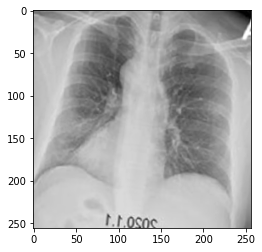

In [6]:

plt.imshow(val_data[43][0][3],cmap='gray')

In [7]:
val_data[43][0][1].shape

(256, 256, 1)

# MyModel


In [8]:
model=Sequential(name='Mymodel')
model.add(Conv2D(32,kernel_size=(3,3),input_shape=[256,256,1],activation='relu',padding='same'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(3,3))
model.add(GaussianDropout(0.4))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [9]:
model.summary()

Model: "Mymodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          3692

In [10]:
opt=Adam(learning_rate=0.001)
los=BinaryCrossentropy()
model.compile(optimizer=opt, loss=los, metrics=["accuracy"])

In [11]:
hist=model.fit(val_data,epochs=0)

  ...
    to  
  ['...']
Train for 474 steps
Epoch 1/50
474/474 [==============================] - 319s 673ms/step - loss: 0.5453 - accuracy: 0.7441
Epoch 2/50
474/474 [==============================] - 297s 627ms/step - loss: 0.5058 - accuracy: 0.7812
Epoch 3/50
474/474 [==============================] - 297s 626ms/step - loss: 0.5015 - accuracy: 0.7814
Epoch 4/50
474/474 [==============================] - 307s 648ms/step - loss: 0.4561 - accuracy: 0.7827
Epoch 5/50
474/474 [==============================] - 312s 659ms/step - loss: 0.4381 - accuracy: 0.7863
Epoch 6/50
474/474 [==============================] - 322s 678ms/step - loss: 0.4523 - accuracy: 0.7917
Epoch 7/50
474/474 [==============================] - 314s 663ms/step - loss: 0.4281 - accuracy: 0.7952
Epoch 8/50
474/474 [==============================] - 311s 657ms/step - loss: 0.4079 - accuracy: 0.7971
Epoch 9/50
474/474 [==============================] - 314s 662ms/step - loss: 0.3866 - accuracy: 0.8076
Epoch 10/50
474/474

KeyboardInterrupt: 

In [1]:
ht=hist.history['loss']

NameError: name 'hist' is not defined